In [1]:
import pandas as pd
from prophet import Prophet


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.tail()

ds          y
2900  2016-01-16   7.817223
2901  2016-01-17   9.273878
2902  2016-01-18  10.333775
2903  2016-01-19   9.125871
2904  2016-01-20   8.891374

In [3]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [4]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
3265 2017-01-15
3266 2017-01-16
3267 2017-01-17
3268 2017-01-18
3269 2017-01-19

In [5]:
forecast = m.predict(future)
display(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2007-12-10  8.039346    8.209731    9.462959     8.039346     8.039346   
1    2007-12-11  8.037802    7.972457    9.234193     8.037802     8.037802   
2    2007-12-12  8.036259    7.800361    8.980290     8.036259     8.036259   
3    2007-12-13  8.034715    7.749053    9.019040     8.034715     8.034715   
4    2007-12-14  8.033172    7.751772    8.977244     8.033172     8.033172   
...         ...       ...         ...         ...          ...          ...   
3265 2017-01-15  7.195628    7.521260    8.941056     6.838300     7.516831   
3266 2017-01-16  7.194612    7.818849    9.252569     6.835175     7.518447   
3267 2017-01-17  7.193596    7.601328    9.053218     6.832355     7.518574   
3268 2017-01-18  7.192580    7.439560    8.858863     6.829683     7.518392   
3269 2017-01-19  7.191564    7.470372    8.852017     6.827111     7.518434   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0           0.803277              0.803277              0.803277  0.352299   
1           0.553349              0.553349              0.553349  0.119636   
2           0.350724              0.350724              0.350724 -0.066658   
3           0.330166              0.330166              0.330166 -0.072265   
4           0.319694              0.319694              0.319694 -0.069568   
...              ...                   ...                   ...       ...   
3265        1.018350              1.018350              1.018350  0.048272   
3266        1.344439              1.344439              1.344439  0.352299   
3267        1.132894              1.132894              1.132894  0.119636   
3268        0.966572              0.966572              0.966572 -0.066658   
3269        0.979545              0.979545              0.979545 -0.072265   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0         0.352299      0.352299  0.450978      0.450978      0.450978   
1         0.119636      0.119636  0.433714      0.433714      0.433714   
2        -0.066658     -0.066658  0.417383      0.417383      0.417383   
3        -0.072265     -0.072265  0.402430      0.402430      0.402430   
4        -0.069568     -0.069568  0.389262      0.389262      0.389262   
...            ...           ...       ...           ...           ...   
3265      0.048272      0.048272  0.970078      0.970078      0.970078   
3266      0.352299      0.352299  0.992140      0.992140      0.992140   
3267      0.119636      0.119636  1.013258      1.013258      1.013258   
3268     -0.066658     -0.066658  1.033230      1.033230      1.033230   
3269     -0.072265     -0.072265  1.051810      1.051810      1.051810   

      multiplicative_terms  multiplicative_terms_lower  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   
...                    ...                         ...   
3265                   0.0                         0.0   
3266                   0.0                         0.0   
3267                   0.0                         0.0   
3268                   0.0                         0.0   
3269                   0.0                         0.0   

      multiplicative_terms_upper      yhat  
0                            0.0  8.842622  
1                            0.0  8.591151  
2                            0.0  8.386983  
3                            0.0  8.364881  
4                            0.0  8.352865  
...                          ...       ...  
3265                         0.0  8.213978  
3266                         0.0  8.539051  
3267                         0.0  8.326490  
3268                         0.0  8.159151  
3269                         0.0  8.171109  



ds      yhat  yhat_lower  yhat_upper
3265 2017-01-15  8.213978    7.521260    8.941056
3266 2017-01-16  8.539051    7.818849    9.252569
3267 2017-01-17  8.326490    7.601328    9.053218
3268 2017-01-18  8.159151    7.439560    8.858863
3269 2017-01-19  8.171109    7.470372    8.852017

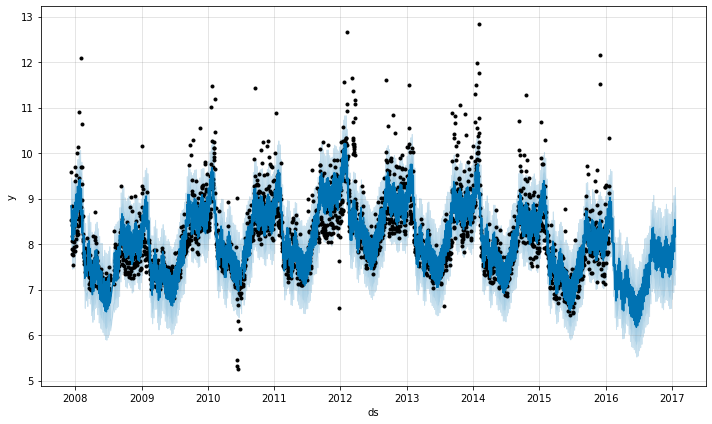

In [6]:
fig1 = m.plot(forecast)

In [7]:
from prophet.plot import plot_plotly, plot_components_plotly, add_changepoints_to_plot

plot_plotly(m, forecast)

In [8]:
plot_components_plotly(m, forecast)

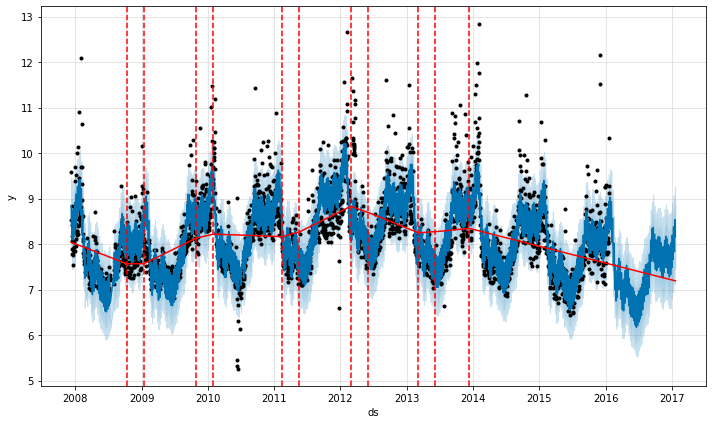

In [9]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)